<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Stochastic dynamic systems </font></p>
<p></p>
<p><font size="5">  Notebook 01: Julia lab - Kalman and particle filters </font></p>
<p><font size="5">  Gonzalo Quintana and Tales Marra </font></p>
</p></br>
</p>
</CENTER>


----------------------------

# <span style="color:#00B8DE">I - Kalman filter (lab 1&2)</span>

Let 

$$
M_t=\sqrt{t}\begin{bmatrix}\cos(2\pi ft)\\ \sin(2\pi ft)\end{bmatrix}
$$

denote the trajectory of a point in a 2D space, with $t=1:T$. The corresponding speed will be calculated using backward finite difference. A noisy version of the trajectory and its speed are observed using a radar. The noise covariance matrix is in the form ${\bf \Sigma}_n=\sigma_n^2\mathbb{I}_4$. We model the system using a simple kinematic model in the form of a state space model where the state vector consists of the position, the speed and the acceleration of the point (as in the lesson). The acceleration is modeled by an $AR(1)$ process: $A_{t+1}=\rho A_t+v_{A,t}$ with ${\bf \Sigma}_{v_A}=\sigma_{v_A}^2\mathbb{I}_2$. We shall write the model 

$$
X_{t+1}={\bf F} X_t +{\bf G} v_t\\
Y_t = {\bf H} X_t+{\bf U} n_t
$$

>- 1) Plot the noiseless and noisy trajectories of position and speed with $T=200$;
>- 2) Give the expressions of ${\bf F}$ and ${\bf H}$ and give the expressions of the matrices ${\bf D}_Q$ and ${\bf D}_R$ in covariance matrices ${\bf Q}=cov[{\bf G} v_t]=σ_v^2 {\bf D}_Q$ and ${\bf R}=cov[{\bf U} n_t]=σ_n^2 {\bf D}_R$;
>- 3) Denoting by  ${\bf K}$, ${\bf P}\_$ and ${\bf P}$ the Kalman gain, and covariance matrices of prediction and filtering errors respectively implement the Kalman filter;
>- 4) Plot the trajectories of position and speed estimated using the Kalman filter. Check the robustness of the estimation with respect to the choice of the parameters of the model;
>- 5) Implement Kalman smoother and check the improvment brought compared to the Kalman filter.

In [1]:
using LinearAlgebra 
using Plots         
using Distributions
using Random
using Statistics

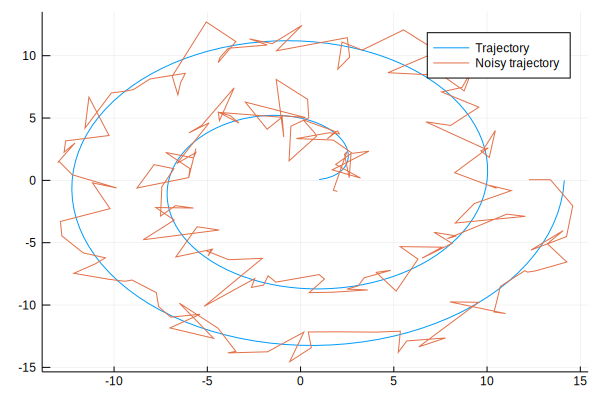

In [10]:
#--------------------------
# PART I : Kalman filter
#--------------------------
# Trajectory synthesis
#---------------------
T = 200
f = 2/T
M = zeros(T, 4)
σn = 1
σv = 0.01

# initial state
M[1,1] = cos(2*π*f);
M[1,2] = sin(2*π*f);
M[1,3] = 0;
M[1,4] = 0;

for t=2:T
    mx = sqrt(t)*cos(2*π*f*t)
    my = sqrt(t)*sin(2*π*f*t)
    M[t,1] = mx;
    M[t,2] = my;
    M[t,3] = mx - M[t-1,1];
    M[t,4] = my- M[t-1,2];
end

M_noisy = M + σn* randn(T,4)

plot(M[:,1],M[:,2], label = "Trajectory")
plot!(M_noisy[:,1],M_noisy[:,2], label = "Noisy trajectory")

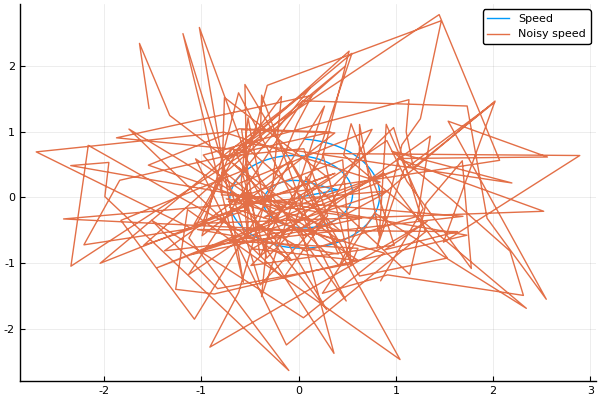

In [77]:
plot(M[:,3],M[:,4], label = "Speed")
plot!(M_noisy[:,3],M_noisy[:,4], label = "Noisy speed")

In [99]:
# State space model
#------------------
ρ = 0.5
F = [Matrix(I,2,2) Matrix(I,2,2) zeros(2,2);
    zeros(2,2) Matrix(I,2,2) Matrix(I,2,2);
    zeros(2,2) zeros(2,2) ρ*Matrix(I,2,2)]

H = [Matrix(I,2,2) zeros(2,2) zeros(2,2);
    zeros(2,2) Matrix(I,2,2) zeros(2,2)]

DQ = [zeros(2,6);
    zeros(2,6);
    zeros(2,4) Matrix(I,2,2)]

DR = Matrix(I,4,4)

G = [zeros(2,6);
    zeros(2,6);
    zeros(2,4) Matrix(I,2,2)]

U = Matrix(I,4,4)

R = σn*DR

Q = σv*DQ

# Observation
#------------


# Storage
#--------

# Filtering
#----------*

x_hat = zeros(T, 6)

x_hat[1,:] = zeros(1,6)
Pt = zeros(T,6,6)
Pt[1,:,:] = Matrix(I,6,6)

for t=2:T
    #prediction
    x_hat_before = F*x_hat[t-1,:]
    
    yt = M_noisy[t,:]
    Pt_before = F*Pt[t-1,:,:]*transpose(F)+G*Q*transpose(G)
    Kt = Pt_before*transpose(H)*inv(H*Pt_before*transpose(H)+U*R*transpose(U))
    
    # correction
    x_hat[t,:] = x_hat_before + Kt*(yt-H*x_hat_before)
    Pt[t,:,:] = Pt_before - Kt*H*Pt_before

end


# Graphic outputs
#----------------

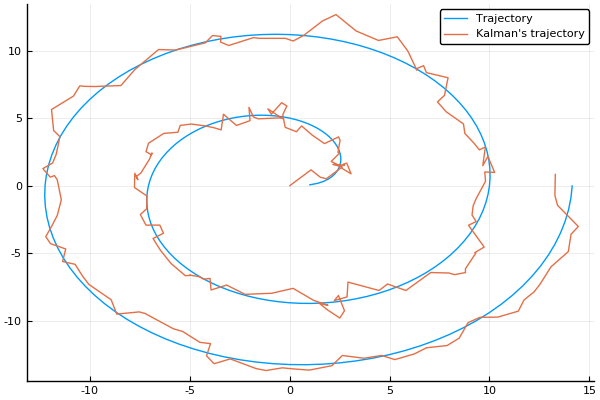

In [91]:
plot(M[:,1],M[:,2], label = "Trajectory")
plot!(x_hat[:,1],x_hat[:,2], label = "Kalman's trajectory")

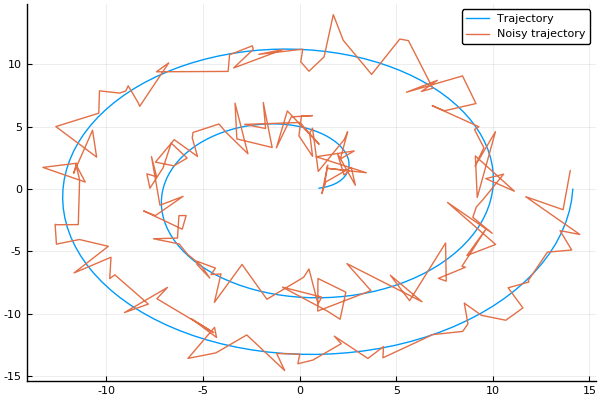

In [93]:
plot(M[:,1],M[:,2], label = "Trajectory")
plot!(M_noisy[:,1],M_noisy[:,2], label = "Noisy trajectory")

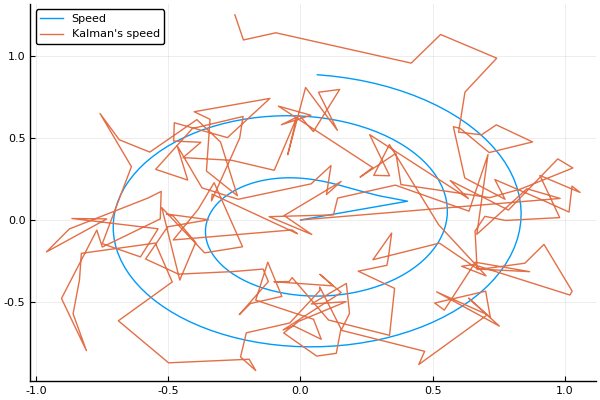

In [89]:
plot!(x_hat[:,3],x_hat[:,4], label = "Kalman's speed")

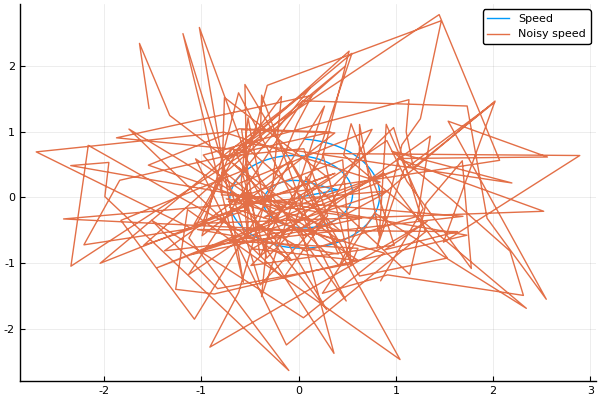

In [90]:
plot(M[:,3],M[:,4], label = "Speed")
plot!(M_noisy[:,3],M_noisy[:,4], label = "Noisy speed")

## Smoothed Kalman

In [110]:
# Smoothing
#----------

m = zeros(T,6)
m[T,:]= x_hat[T,:]

t = T-1

while t>1
    K = Pt[t,:,:]*transpose(F)*inv(Q+F*Pt[t,:,:]*transpose(F))
    
    m[t,:] = x_hat[t,:] + K*(m[t+1,:]-F*x_hat[t,:])
    
    t -= 1
end

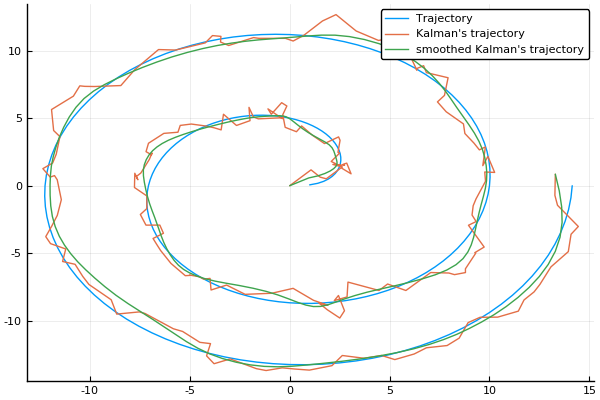

In [123]:
plot(M[:,1],M[:,2], label = "Trajectory")
plot!(x_hat[:,1],x_hat[:,2], label = "Kalman's trajectory")
plot!(m[:,1],m[:,2], label = "smoothed Kalman's trajectory")

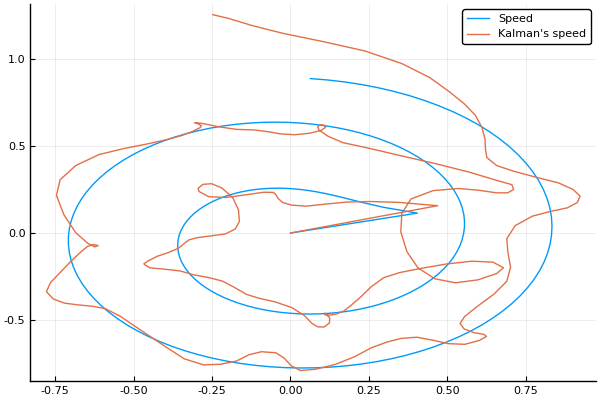

In [122]:
plot(M[:,3],M[:,4], label = "Speed")
plot!(m[:,3],m[:,4], label = "Kalman's speed")

# <span style="color:#00B8DE">II - Particle filtering (lab 3)</span>

We consider the following nonlinear system:

$$
\begin{array}{lll}
{\text{state: }} &x_{t+1} &= 0.5 x_t + \dfrac{25x_t}{1+x_t^2}+8\cos(1,2t)+ v_t,\\
{\text{observation: }} &y_t &= 0.05 x_t^2+ w_t,
\end{array}
$$

with $v_t$ and $w_t$ having respective distributions $\mathcal{N}(0,0.1)$ and $\mathcal{N}(0,1)$.
We want to estimate recursively the state of the system by using a bootstrap particle filter.
We shall use 100 particles and choose $N_{eff}=90$.

>- 1) Generate a trajectory of $y$ for $t=1:T$ with $T=100$. Plot it as well as the corresponding trajectory of x.
What do we note ? For the model studied here what is the main difficulty met in estimating $x$ from $y$?
>- 2) Simulate $N=10^3$ particles using $p(x_t|x_{t-1}^{(i)})$ as an importance distribution and implement the code for generating particles, calculating weights and normalized weights. Implement resampling and apply it when $N_{eff}<90\% N$. What is the resampling rate ?
>- 3) What occurs as the state noise variance increases ? Explanations ?
>- 4) Possibly test the code with other noise distributions

In [194]:
#-----------------------------
# 1) Data model and generation
#-----------------------------
T = 100
σn = sqrt(0.1)
#σn = 1

x = zeros(T+1)
y = zeros(T)
x[1] = 0

for t=1:T
    
    y[t] = 0.05*x[t]^2 + randn()
    
    x[t+1] = 0.5*x[t]+25*x[t]/(1+x[t]^2)+8*cos(1.2*t)+ σn*randn()
end
    

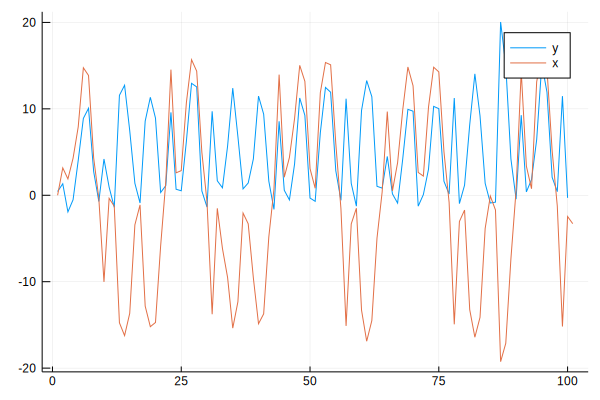

In [195]:

# Graphic outputs
#----------------
plot(y, label="y")
plot!(x, label="x")

We can note that it's not easy to estimate x with y, as y depends on the square power of x. We cannot tell by looking at y whether x goes negative or not. 

In [196]:
#--------------------------
# 2) Particle sampling
#--------------------------
# Particles initialization
#--------------------------
    
N = 1000
x0 = 0
T = 100

x_hat = zeros(N,T)
w = ones(1,N)./N
x_hat[:,1] = x0 .+ randn(N)

for t=2:T
            
    x_hat[:,t] = 0.5*x[t-1]+25*x[t-1]./(1+x[t-1].^2)+8*cos(1.2*t).+ sqrt(0.1)*randn(N)
    
    w = [pdf(Normal.(0.05*u^2,σn),v) for (u,v) in zip(x_hat[:,t],y[t]*ones(N))]
        
    w = w./sum(w)

    distW = Categorical(w)
    
    x_hat[:,t] = x_hat[rand(distW,N),t]
        
end

In [197]:
x_hat_means = zeros(T)
for t=1:T
    x_hat_means[t]=mean(x_hat[:,t])
end

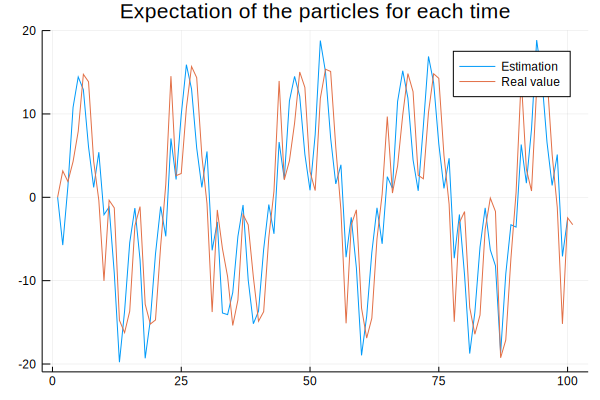

In [199]:
plot(x_hat_means, label="Estimation", title="Expectation of the particles for each time")
plot!(x, label="Real value")